## Class 一些概念和实现原理

1. 除了函数可以双下划线，构造私有化方法以外，变量无法通过加下划线来私有化

    Python 没有禁止访问类中某一成员的保护机制，而是通过编码规范规定了对变量命名的公约，约定什么样的变量名表示变量是私有的，**不应该**被访问(而不是**不能**被访问)

* 下例中的 `_name` 以单下划线开头的应视为私有变量（但仍然可以被改变）

* 类变量属于整个类 `Student.school` ，在实例化的时候**不会**把它实例化进每个对象（看 PythonTutor 就可以知道，只是存在 Student 类里）

    当用某个对象访问时 `me.school` ，会先在对象的成员变量中找；找不到再去对象所在的类中找相应的类变量

    于是下面的 `me` `you` 本身都没有 `school` 这个成员变量，都会输出类变量 `Student.school` 。但当另 `me.school = "THU"` 后，意味着给 `me` 创建了一个叫 `school` 的成员变量。

    那么无论后面 `Student.school` 怎么改变，打印 `me.school` 的时候都会打印先找到的自己的成员变量

In [2]:
class Student:
    school = "SJTU"
    def __init__(self, name, age):
        self._name = name
        self.age = age

me = Student("Tao", 18)
you = Student("Ray", 19)

me.school = "THU"
print(f"me.school = {me.school}, you.school = {you.school}")
Student.school = "PKU"
print(f"me.school = {me.school}, you.school = {you.school}")

me.school = THU, you.school = SJTU
me.school = THU, you.school = PKU


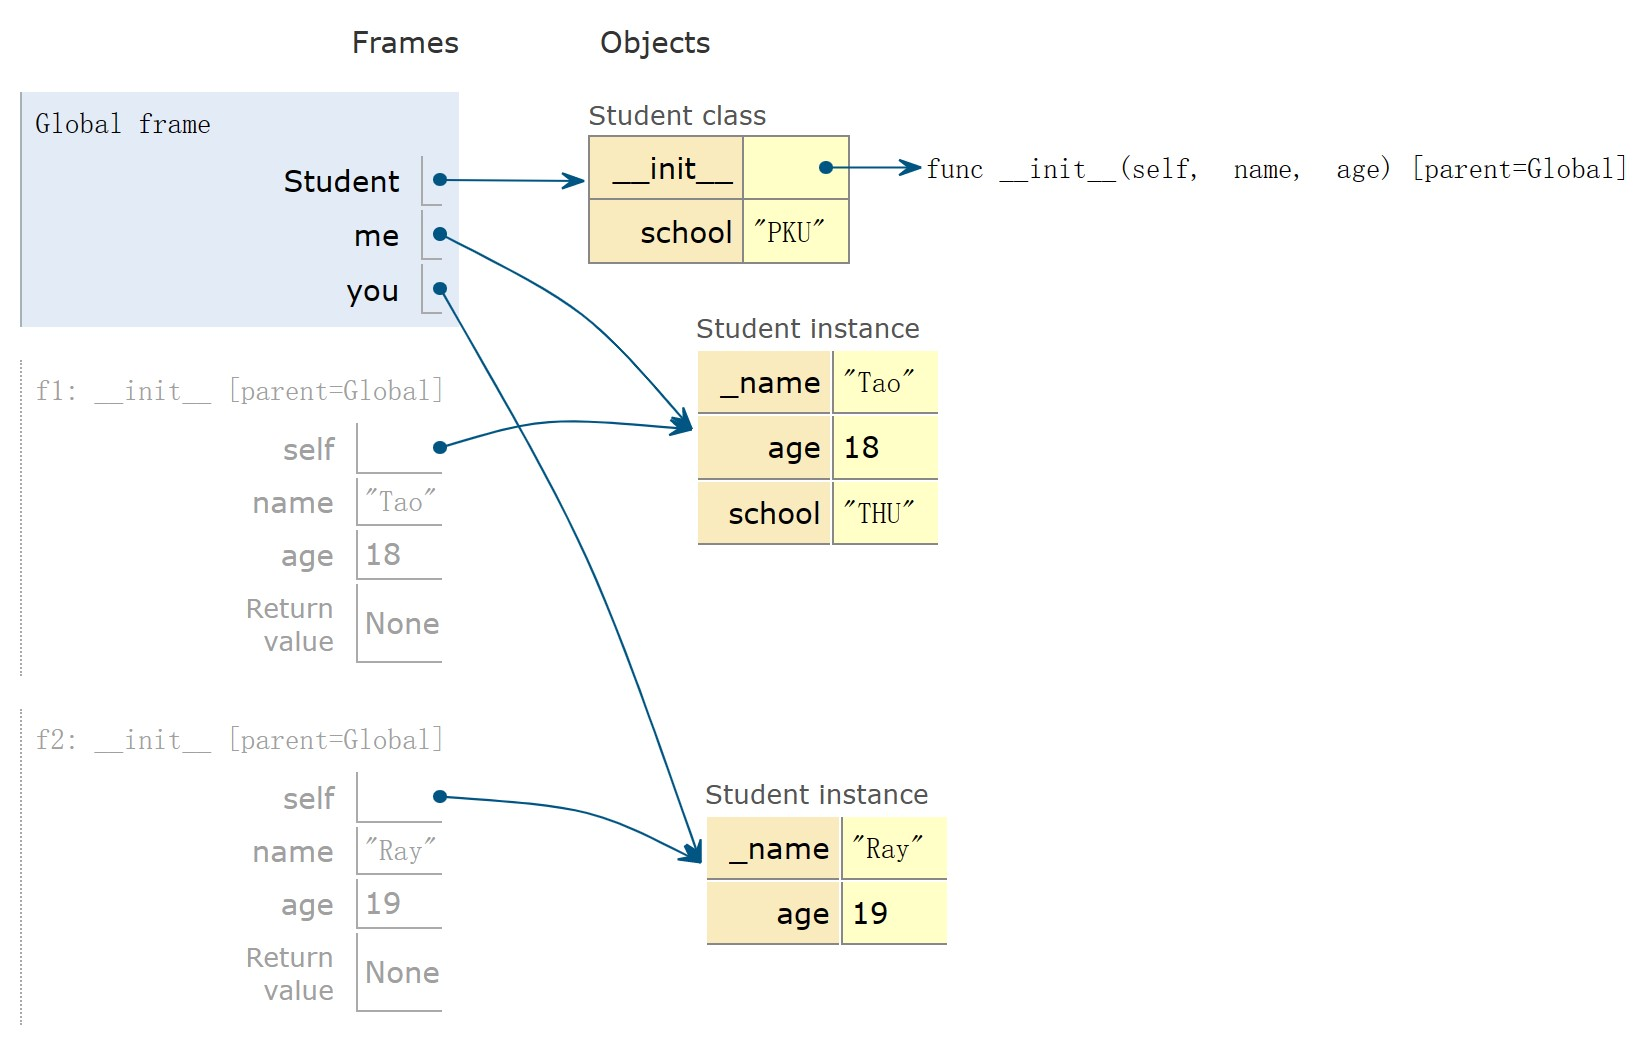

2. 继承 Inheritance

参考 `Zoo_class.py`

3. 所有类型都是从 `object` 类中继承来的，`bool` 类型继承 `int`

In [12]:
class some_class:
    def __init__(self, x=0):
        self.value = x
        self.is_implement = True
        self.name = "Some Class"

# 某特定类的 __class__ 是 type 类型, 意思是这是一种 type
print(some_class.__class__, object.__class__, int.__class__)

some_instance = some_class()
print(some_instance.__class__)
print(some_instance.__class__.__bases__)

int_attr = some_instance.value
int_class = int_attr.__class__
int_from = int_class.__bases__
print(f"self.value's class: {int_class}, which is from: {int_from}")

bool_attr = some_instance.is_implement
bool_class = bool_attr.__class__
bool_from = bool_class.__bases__
print(f"self.is_implement's class: {bool_class}, which is from: {bool_from}")

<class 'type'> <class 'type'> <class 'type'>
<class '__main__.some_class'>
(<class 'object'>,)
self.value's class: <class 'int'>, which is from: (<class 'object'>,)
self.is_implement's class: <class 'bool'>, which is from: (<class 'int'>,)


4. 类的内置方法 `dir(class)`

In [16]:
print(dir(object))

class C:
    def method1(): pass
    def method2(): pass
    def method3(): pass
instance = C()
print(dir(instance)[::-1][0:3][::-1])   # 多出来了三个新建类方法

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
['method1', 'method2', 'method3']


* `__str__()`
* `__repr__()` 返回一个可计算的表达式，即用 `eval()` 运算后得到一个与原对象相同的东西

是值相同，但新的地址

注意：所有以双下划线开头结尾的函数都对应一个实现的语法糖，比如 `str()` `repr()`

In [28]:
from fractions import Fraction

one_half = Fraction(1, 2)
print(one_half.__str__())
print(one_half.__repr__())

another = one_half.__repr__()
# Fraction.__repr__(one_half) # 真实的转换成的运行语句
print(one_half is eval(another), one_half == eval(another))

1/2
Fraction(1, 2)
False True


4. 检查类是否具有某个属性

In [34]:
class Student:
    def __init__(self):
        self.name = "Student One"
        self.age = 18
        self.school = "SJTU"

me = Student()
age = getattr(me, "age", None)
address = getattr(me, "address", None)
print(f"age is {age}, address is {address}")

age is 18, address is None


In [36]:
class Human:
    def __init__(self, name, age):
        self.age = age
        self.name = name
    def growth(self):
        self.age += 1
    def __getattribute__(self, name):
        print(f"Now is finding {name}")
        return super().__getattribute__(name)
    def __setattr__(self, name, value):
        print(f"Now is changing {name}")
        return super().__setattr__(name, value)
    
person = Human("TR", 18)
person.growth()
print(person.age)

Now is changing age
Now is changing name
Now is finding growth
Now is finding age
Now is changing age
Now is finding age
19
